In [68]:
%matplotlib inline
import missingno as msno
import seaborn as sns
sns.set()
import numpy as np
import pandas as pd
import math
from collections import defaultdict
import matplotlib.pyplot as plt

In [8]:
# school system finances dataset
schools = pd.read_excel('elsec15.xls', nrows=50000)

In [14]:
schools.head()

,STATE,IDCENSUS,NAME,CONUM,CSA,CBSA,SCHLEV,NCESID,YRDATA,V33,...,V32,_19H,_21F,_31F,_41F,_61V,_66V,W01,W31,W61
0,1,1500100100000,AUTAUGA COUNTY SCHOOL DISTRICT,1001,N,33860,3,0100240,15,9664,...,0,49431,16603,2992,63042,0,0,2094,372,8617
1,1,1500200100000,BALDWIN COUNTY SCHOOL DISTRICT,1003,380,19300,3,0100270,15,30596,...,0,337160,99087,13027,423220,0,0,5784,50441,71370
2,1,1500300100000,BARBOUR COUNTY SCHOOL DISTRICT,1005,N,N,3,0100300,15,925,...,0,8024,0,304,7720,0,0,0,0,646
3,1,1500300200000,EUFAULA CITY SCHOOL DISTRICT,1005,N,N,3,0101410,15,2829,...,0,0,0,0,0,0,0,0,2054,7478
4,1,1500400100000,BIBB COUNTY SCHOOL DISTRICT,1007,142,13820,3,0100360,15,3357,...,0,22155,0,1190,20965,0,0,1397,790,5400


In [9]:
schools.describe()

,STATE,IDCENSUS,CONUM,SCHLEV,YRDATA,V33,TOTALREV,TFEDREV,C14,C15,...,V32,_19H,_21F,_31F,_41F,_61V,_66V,W01,W31,W61
count,14376.000000,1.437600e+04,14376.000000,14376.000000,14376.0,14376.000000,1.437600e+04,1.437600e+04,14376.000000,14376.000000,...,14376.000000,1.437600e+04,1.437600e+04,14376.000000,1.437600e+04,14376.000000,14376.000000,14376.000000,14376.000000,1.437600e+04
mean,26.801336,2.728090e+13,29838.158598,2.883139,15.0,3374.682526,4.546951e+04,3.708038e+03,915.914858,752.781093,...,7.318656,2.871850e+04,4.831726e+03,3936.853158,2.957606e+04,487.162354,553.761547,1335.636825,3710.651920,9.091542e+03
std,13.894331,1.389514e+13,14753.492121,1.271649,0.0,14419.737037,2.590623e+05,2.021328e+04,5972.748111,3619.184513,...,122.649299,1.841763e+05,2.652979e+04,20071.591744,1.894224e+05,3555.988118,6968.740454,10651.097318,20183.852905,3.261580e+04
min,1.000000,1.500100e+12,1001.000000,1.000000,15.0,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,...,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000e+00
25%,15.000000,1.550327e+13,18063.000000,3.000000,15.0,305.000000,5.241500e+03,2.920000e+02,54.000000,0.000000,...,0.000000,8.400000e+01,0.000000e+00,5.000000,7.150000e+01,0.000000,0.000000,0.000000,0.000000,8.350000e+02
50%,27.000000,2.750320e+13,30063.000000,3.000000,15.0,979.500000,1.402300e+04,8.470000e+02,180.000000,118.000000,...,0.000000,4.034000e+03,0.000000e+00,410.000000,4.143500e+03,0.000000,0.000000,0.000000,0.000000,2.708500e+03
75%,38.000000,3.850053e+13,41009.000000,3.000000,15.0,2744.250000,3.791375e+04,2.433500e+03,545.250000,532.000000,...,0.000000,1.866350e+04,3.030000e+02,1845.000000,1.912600e+04,0.000000,0.000000,491.000000,626.250000,7.567500e+03
max,51.000000,5.150230e+13,56045.000000,7.000000,15.0,995192.000000,2.543738e+07,1.307783e+06,379531.000000,248209.000000,...,7753.000000,1.372802e+07,1.312286e+06,731854.000000,1.447108e+07,173300.000000,700000.000000,869643.000000,885058.000000,2.355662e+06


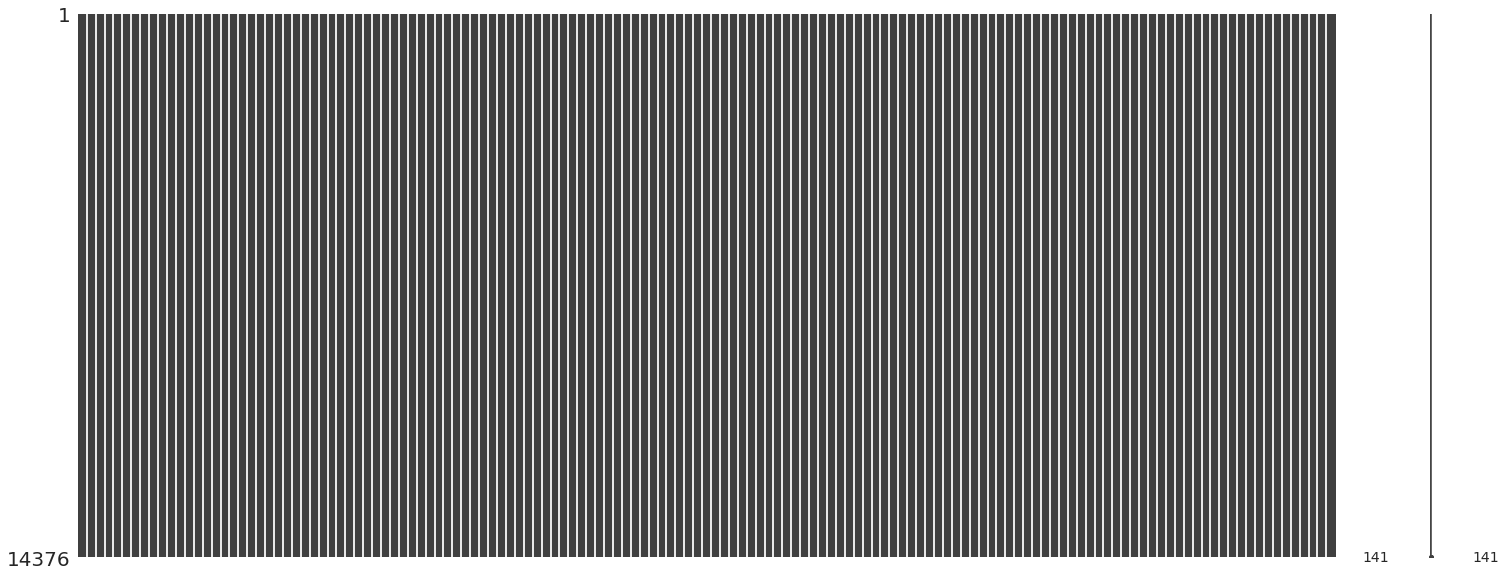

In [43]:
msno.matrix(schools)

In [15]:
doc_data = """C14 C15 C16 C17 C19 B11 C20 C25 C36 B10 B12 B13 C01 C04 C05 C06 C07 C08 C09 C10 C11 C12 C13 C24 C35 C38 C39 T02 T06 T09 T15 T40 T99 D11 D23 A07 A08 A09 A11 A13 A15 A20 A40 U11 U22 U30 U50 U97 E13 J13 J12 J14 V91 V92 E17 E07 E08 E09 V40 V45 V90 V85 J17 J07 J08 J09 J40 J45 J90 J11 J96 E11 V60 V65 J10 J97 V70 V75 V80 J98 F12 G15 K09 K10 K11 J99 L12 M12 Q11 I86 Z32 Z33 V11 V13 V15 V17 V21 V23 V37 V29 Z34 V10 V12 V14 V16 V18 V22 V24 V38 V30 V32 _19H _21F _31F _41F _61V _66V W01 W31 W61
Federal revenue through the state - Title I
Federal revenue through the state - Children with disabilities - IDEA
Federal revenue through the state - Math, science, and teacher quality
Federal revenue through the state - Safe and drug-free schools
Federal revenue through the state - Vocational and technical education
Federal revenue through the state - Bilingual education
Federal revenue through the state - All other
Federal revenue through the state - Child nutrition programs
Federal revenue - Nonspecified
Direct federal revenue - Impact aid (P.L. 81-815 and 81-874)
Direct federal revenue - Native American (Indian) education
Direct federal revenue - All other
General formula assistance
Staff improvement programs
Special education programs
Compensatory and basic skills attainment programs
Bilingual education programs
Gifted and talented programs
Vocational education programs
School lunch programs
Capital outlay and debt service programs
Transportation programs
All other revenues from state sources
Census state, NCES local revenue
State revenue - Nonspecified
State payments on behalf - Benefits
State payments on behalf - Nonbenefits
Parent government contributions
Property taxes
General sales or gross receipts taxes
Public utility taxes
Individual and corporate income taxes
All other taxes
Revenue from other school systems
Revenue from cities and counties
Tuition fees from pupils, parents, and other private sources
Transportation fees from pupils, parents, and other private sources
School lunch revenues
Textbook sales and rentals
District activity receipts
Student fees, nonspecified
Other sales and service revenues
Rents and royalties
Sale of property
Interest earnings
Fines and forfeits
Private contributions
Miscellaneous other local revenues
Current operation expenditure - Instruction
State payments on behalf - Instruction benefits
Own retirement system transfer - Instruction
State payments on behalf - Instruction nonbenefits
Exhibit - Payments to private schools
Exhibit - Payments to charter schools
Current operation expenditure - Pupil support
Current operation expenditure - Instructional staff support
Current operation expenditure - General administration
Current operation expenditure - School administration
Current operation expenditure - Operation and maintenance of plant
Current operation expenditure - Student transportation
Current operation expenditure - Business/central/other support services
Current operation expenditure - Nonspecified support services
State payments on behalf - Pupil support benefits
State payments on behalf - Instructional staff support benefits
State payments on behalf - General administration benefits
State payments on behalf - School administration benefits
State payments on behalf - Operation and maintenance of plant benefits
State payments on behalf - Student transportation benefits
State payments on behalf - Business/central/other support services benefits
Own retirement system transfer - Support services
State payments on behalf - Support services, nonbenefits
Current operation expenditure - Food services
Current operation expenditure - Enterprise operations
Current operation expenditure - Other elementary-secondary programs
State payments on behalf - Other benefits
State payments on behalf - Noninstructional and nonbenefits
Current operation expenditure - Community services
Current operation expenditure - Adult education
Current operation expenditure - Other nonelementary-secondary programs
State payments on behalf - Nonelementary-secondary programs
Construction
Purchase of land and existing structures
Instructional equipment
Other equipment
Nonspecified equipment
State payments on behalf - Capital outlay
Payments to state governments
Payments to local governments
Payments to other school systems
Interest on school system debt
Total salaries and wages
Total salaries and wages - Instruction
Total salaries and wages - Pupil support
Total salaries and wages - Instructional staff support
Total salaries and wages - General administration
Total salaries and wages - School administration
Total salaries and wages - Operation and maintenance of plant
Total salaries and wages - Student transportation
Total salaries and wages - Business/central/other support services
Total salaries and wages - Food services
Total employee benefit payments
Total employee benefit payments - Instruction
Total employee benefit payments - Pupil support
Total employee benefit payments - Instructional staff
Total employee benefit payments - General administration
Total employee benefit payments - School administration
Total employee benefit payments - Operation and maintenance of plant
Total employee benefit payments - Student transportation
Total employee benefit payments - Business/central/other support services
Total employee benefit payments - Food services
Total employee benefit payments - Enterprise operations
Long-term debt outstanding at beginning of the fiscal year
Long-term debt issued during the fiscal year
Long-term debt retired during the fiscal year
Long-term debt outstanding at end of fiscal year
Short-term debt outstanding at beginning of the fiscal year
Short-term debt outstanding at end of the fiscal year
Cash and deposits, held at end of fiscal year - Debt service funds
Cash and deposits, held at end of fiscal year - Bond funds
Cash and deposits, held at end of fiscal year - Other funds""".split('\n')

In [14]:
keys = doc_data[0].split(' ')
print(len(keys) - (len(doc_data)-1)) # sanity check

0


In [22]:
keyword_lookup = {}
for i in range(len(keys)):
    keyword_lookup[keys[i]] = doc_data[i+1]

In [118]:
def totrev_by_state(dataframe):
    statevtotrev = defaultdict(lambda:0)
    for index, row in dataframe.iterrows():
        statevtotrev[row.STATE] += row.TOTALREV
    sortbystate = sorted(statevtotrev.items())
    return sortbystate


def totexp_by_state(dataframe):
    statevtotexp = defaultdict(lambda:0)
    for index, row in dataframe.iterrows():
        statevtotexp[row.STATE] += row.TOTALEXP
    sortbystate = sorted(statevtotexp.items())
    return sortbystate

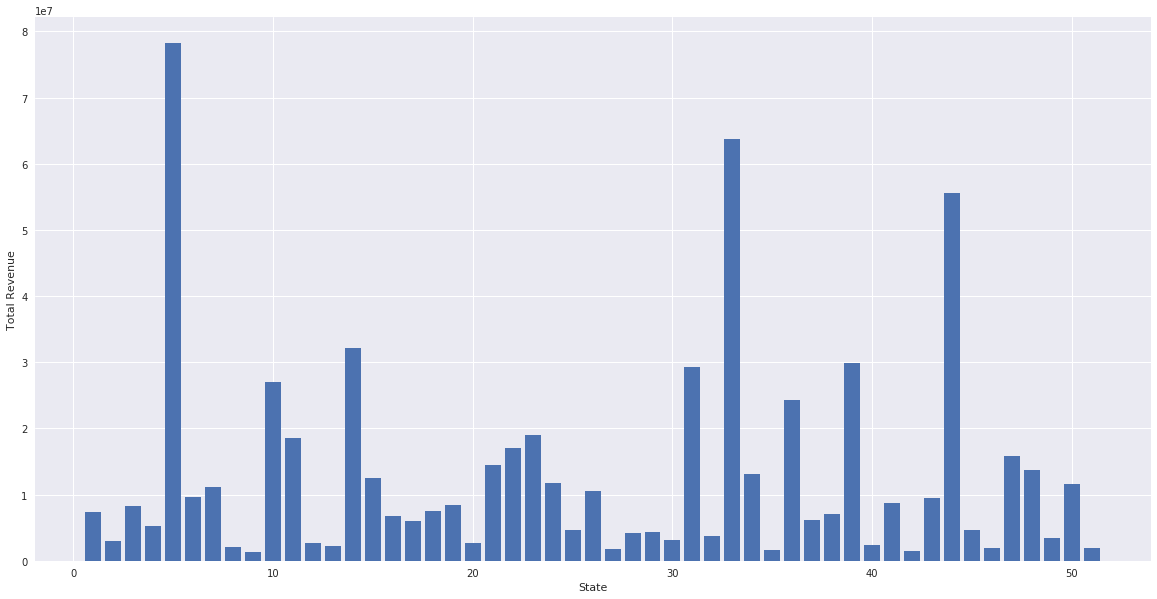

In [106]:
state, totrev = zip(*totrev_by_state(schools))

plt.figure(figsize = (20, 10))
plt.xlabel('State')
plt.ylabel('Total Revenue')
plt.bar(state, totrev)
plt.show()

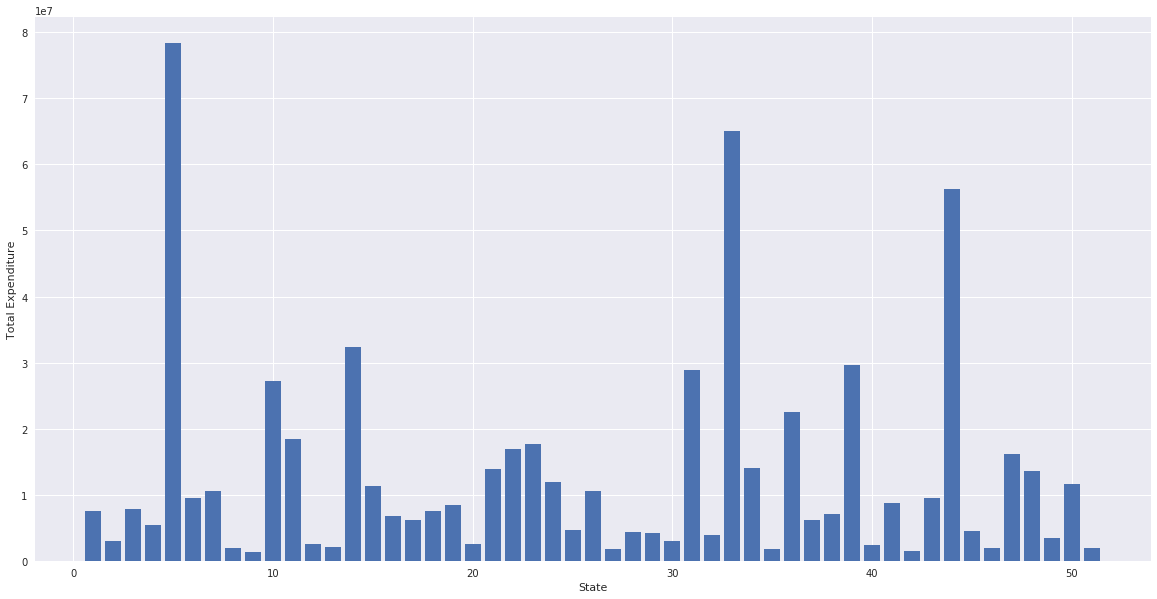

In [107]:
state2, totexp = zip(*totexp_by_state(schools))

plt.figure(figsize = (20, 10))
plt.xlabel('State')
plt.ylabel('Total Expenditure')
plt.bar(state2, totexp)
plt.show()

In [114]:
def avgtotrev_by_state(dataframe):
    entriesperstate = defaultdict(lambda:0)
    statevtotrev = defaultdict(lambda:0)
    for index, row in dataframe.iterrows():
        entriesperstate[row.STATE] += 1
        statevtotrev[row.STATE] += row.TOTALREV
    for state in statevtotrev.keys():
        statevtotrev[state] = statevtotrev[state] / entriesperstate[state]
    sortbystate = sorted(statevtotrev.items())
    return sortbystate


def avgtotexp_by_state(dataframe):
    entriesperstate = defaultdict(lambda:0)
    statevtotexp = defaultdict(lambda:0)
    for index, row in dataframe.iterrows():
        entriesperstate[row.STATE] += 1
        statevtotexp[row.STATE] += row.TOTALEXP
    for state in statevtotexp.keys():
        statevtotexp[state] = statevtotexp[state] / entriesperstate[state]
    sortbystate = sorted(statevtotexp.items())
    return sortbystate

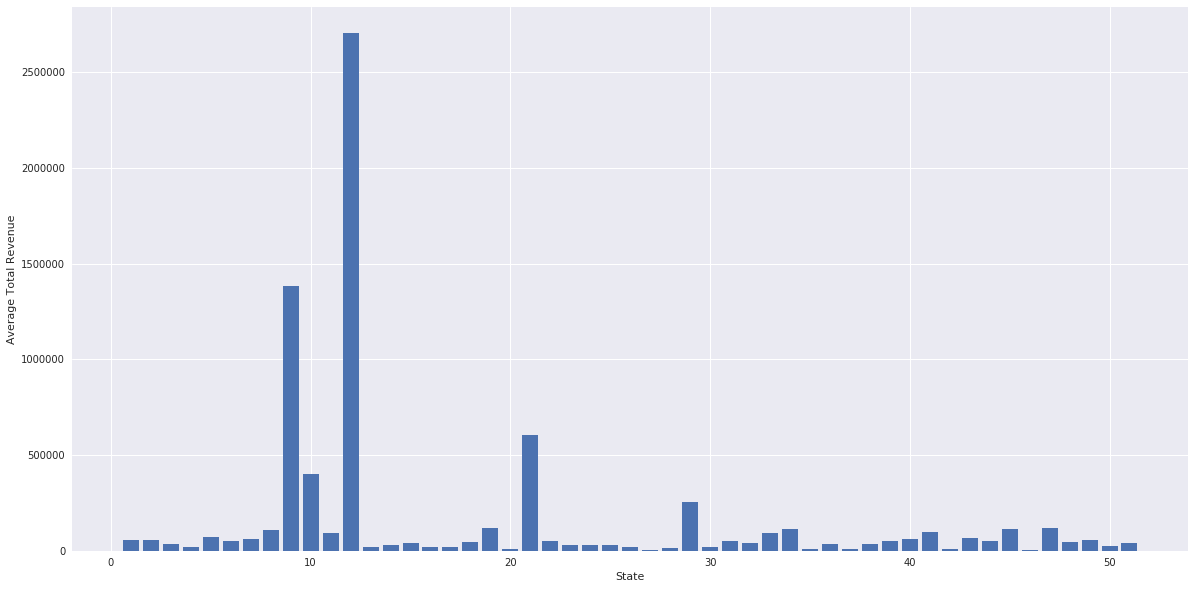

In [116]:
state3, avgtotrev = zip(*avgtotrev_by_state(schools))

plt.figure(figsize = (20, 10))
plt.xlabel('State')
plt.ylabel('Average Total Revenue')
plt.bar(state3, avgtotrev)
plt.show()

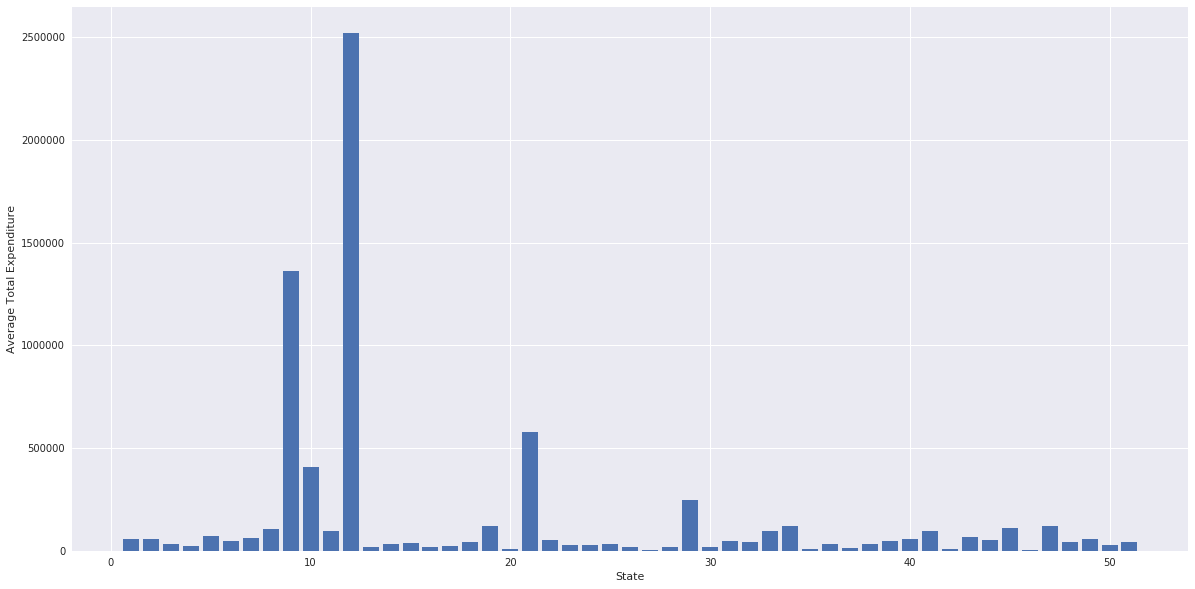

In [117]:
state4, avgtotexp = zip(*avgtotexp_by_state(schools))

plt.figure(figsize = (20, 10))
plt.xlabel('State')
plt.ylabel('Average Total Expenditure')
plt.bar(state4, avgtotexp)
plt.show()